In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
data = pd.read_csv("data.csv", low_memory=False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649368 entries, 0 to 649367
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MeasureMRM12                  499279 non-null  float64
 1   MeasureMRM30                  497557 non-null  float64
 2   MeasureMRM204                 505494 non-null  float64
 3   MeasureMRM205                 497536 non-null  float64
 4   MeasureMRM143                 536096 non-null  float64
 5   MeasureMRM187                 536104 non-null  float64
 6   MeasureMRM188                 536104 non-null  float64
 7   MeasureMRM144                 522000 non-null  float64
 8   ReservoirTemperature_c        649284 non-null  float64
 9   ProducingGOR_m3_t             649340 non-null  float64
 10  LiquidViscosity               649027 non-null  float64
 11  WeightedParticlesFactor_mg_l  615894 non-null  float64
 12  daysToFailure                 649368 non-nul

In [6]:
data['Failure'] = data['daysToFailure'].apply(lambda x: 1 if x <= 15 else 0)
data.update(data['Failure'])
data = data.astype({'Failure': 'Int64'})

In [7]:
# data.to_csv('answers.csv', index=False)

In [8]:
sns.set(style='dark')

In [9]:
data.head()

,MeasureMRM12,MeasureMRM30,MeasureMRM204,MeasureMRM205,MeasureMRM143,MeasureMRM187,MeasureMRM188,MeasureMRM144,ReservoirTemperature_c,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,daysToFailure,Failure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN,773,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN,772,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN,771,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN,770,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN,769,0


In [10]:
data.shape

(649368, 14)

In [11]:
missing_values_count = data.isnull().sum()

print("Количество нулей в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество нулей в каждой колонке:
MeasureMRM12: 150089
MeasureMRM30: 151811
MeasureMRM204: 143874
MeasureMRM205: 151832
MeasureMRM143: 113272
MeasureMRM187: 113264
MeasureMRM188: 113264
MeasureMRM144: 127368
ReservoirTemperature_c: 84
ProducingGOR_m3_t: 28
LiquidViscosity: 341
WeightedParticlesFactor_mg_l: 33474
daysToFailure: 0
Failure: 0


In [12]:
missing_values_count = data.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
MeasureMRM12: 150089
MeasureMRM30: 151811
MeasureMRM204: 143874
MeasureMRM205: 151832
MeasureMRM143: 113272
MeasureMRM187: 113264
MeasureMRM188: 113264
MeasureMRM144: 127368
ReservoirTemperature_c: 84
ProducingGOR_m3_t: 28
LiquidViscosity: 341
WeightedParticlesFactor_mg_l: 33474
daysToFailure: 0
Failure: 0


In [19]:
def many_plot(series):
    layout = (3, 4)
    fig, axs = plt.subplots(layout[0], layout[1], figsize=(14, 10))

    for i, (key, value) in enumerate(series.items()):
        row = i // layout[1]
        col = i % layout[1]
        ax = axs[row, col]
        ax.set_title(key)
        sns.lineplot(data=value, ax=ax, color='blue')
        
        ax.set(xlabel='t')
        ax.grid(True)
    
    plt.tight_layout()
    plt.savefig('TS features.png', dpi=300)
    plt.show()
    

In [14]:
# anomal = data[data['daysToFailure'] <= 15].copy()
# clean_data = data[data['daysToFailure'] > 15].copy()

In [15]:
# anomalies=anomal[['ReservoirTemperature_c', 'MeasureMRM204',
#        'MeasureMRM205', 'ProducingGOR_m3_t', 'LiquidViscosity',
#        'MeasureMRM219', 'WeightedParticlesFactor_mg_l', 'MeasureMRM187',
#        'MeasureMRM188', 'MeasureMRM12', 'MeasureMRM30', 'MeasureMRM143',
#        'MeasureMRM144']]

In [16]:
series=data.drop(['daysToFailure','Failure'], axis=1)

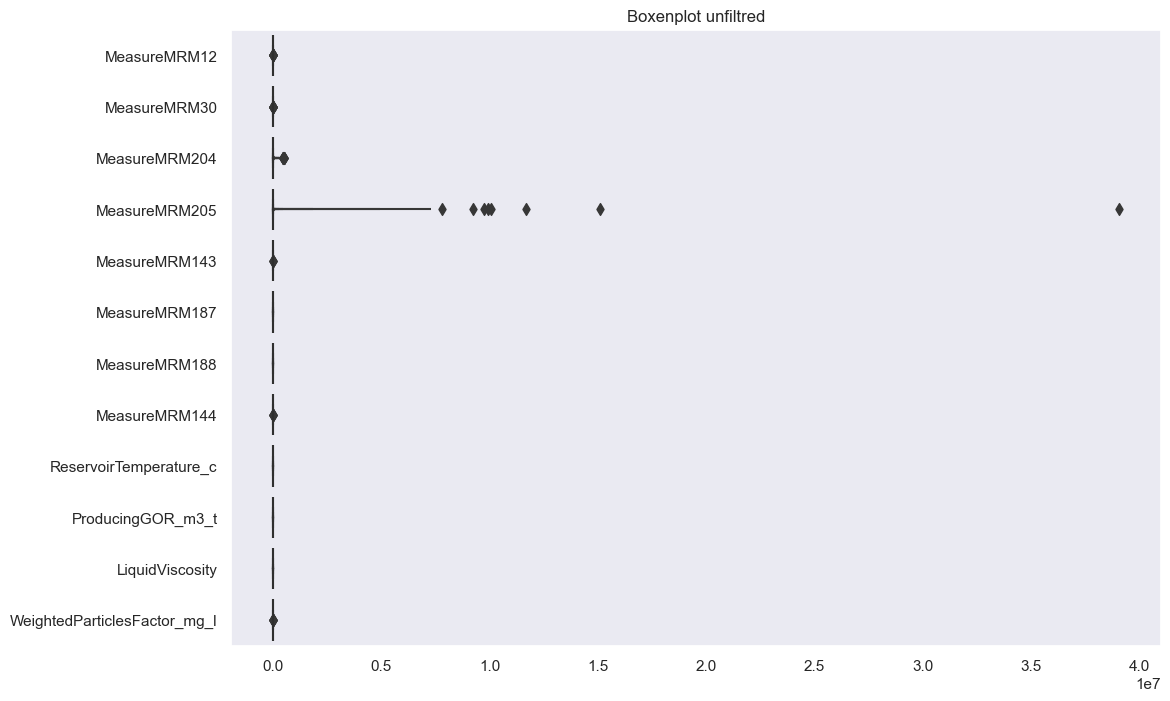

In [17]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=series,palette='Dark2', orient='h')
plt.title('Boxenplot unfiltred')
plt.savefig('boxenplot_unfiltred.png', dpi=500)
plt.show()

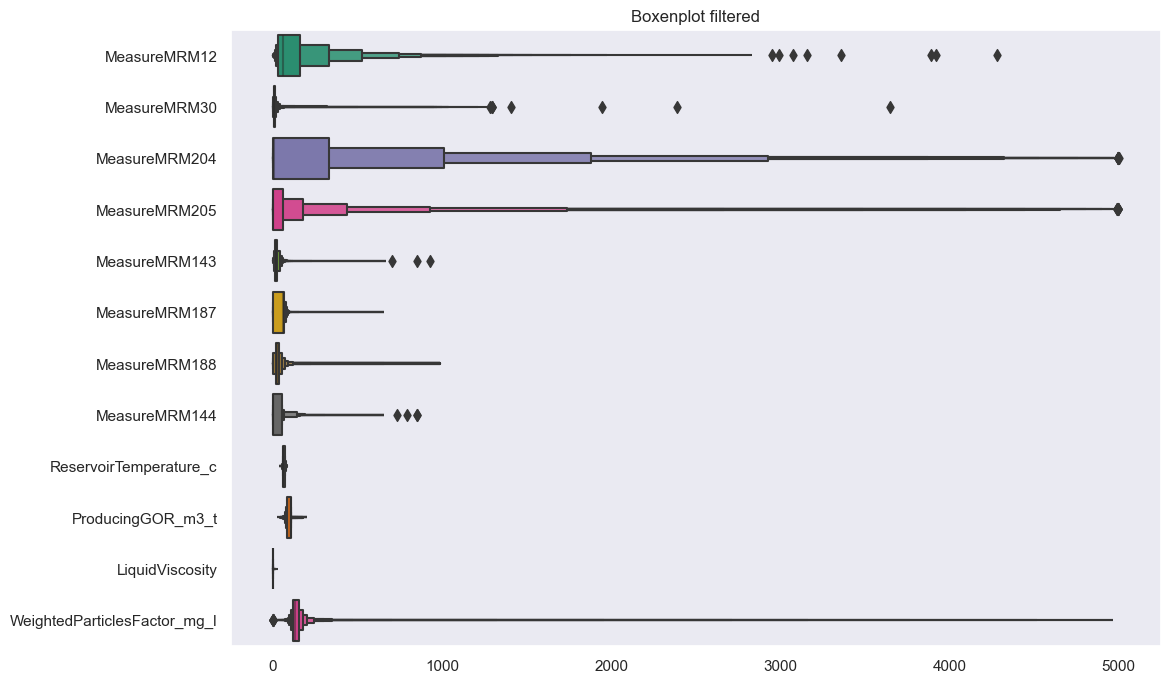

In [18]:
series = series[series <= 0.5*1e4]

# Теперь строим boxenplot с отфильтрованными данными
plt.figure(figsize=(12, 8))
sns.boxenplot(data=series, palette='Dark2', orient='h')
plt.title('Boxenplot filtered')
plt.savefig('boxenplot_filtred.png', dpi=500)
plt.show()

In [21]:
series['ReservoirTemperature_c'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 649368 entries, 0 to 649367
Series name: ReservoirTemperature_c
Non-Null Count   Dtype  
--------------   -----  
649284 non-null  float64
dtypes: float64(1)
memory usage: 5.0 MB


In [22]:
missing_values_count = data.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
MeasureMRM12: 150089
MeasureMRM30: 151811
MeasureMRM204: 143874
MeasureMRM205: 151832
MeasureMRM143: 113272
MeasureMRM187: 113264
MeasureMRM188: 113264
MeasureMRM144: 127368
ReservoirTemperature_c: 84
ProducingGOR_m3_t: 28
LiquidViscosity: 341
WeightedParticlesFactor_mg_l: 33474
daysToFailure: 0
Failure: 0


In [38]:
# def remove_outliers_and_interpolate(column, threshold):
#     Q1 = np.percentile(column, 25)
#     Q3 = np.percentile(column, 75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - threshold * IQR
#     upper_bound = Q3 + threshold * IQR

#     filtered_column = column[(column >= lower_bound) & (column <= upper_bound)]
#     interpolated_column = filtered_column.interpolate(method='nearest')
#     return interpolated_column

# threshold = 2.5  # Новое пороговое значение

# for column_name, column_data in series.items():
#     series[column_name] = remove_outliers_and_interpolate(column_data, threshold)

# # Обновление датасета X
# series = pd.concat([series.loc[:, ~series.columns.isin(series.keys())], pd.DataFrame(series)], axis=1)
# series.head()

,MeasureMRM12,MeasureMRM30,MeasureMRM204,MeasureMRM205,MeasureMRM143,MeasureMRM187,MeasureMRM188,MeasureMRM144,ReservoirTemperature_c,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649368 entries, 0 to 649367
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MeasureMRM12                  0 non-null      float64
 1   MeasureMRM30                  0 non-null      float64
 2   MeasureMRM204                 0 non-null      float64
 3   MeasureMRM205                 0 non-null      float64
 4   MeasureMRM143                 0 non-null      float64
 5   MeasureMRM187                 0 non-null      float64
 6   MeasureMRM188                 0 non-null      float64
 7   MeasureMRM144                 0 non-null      float64
 8   ReservoirTemperature_c        0 non-null      float64
 9   ProducingGOR_m3_t             0 non-null      float64
 10  LiquidViscosity               0 non-null      float64
 11  WeightedParticlesFactor_mg_l  0 non-null      float64
dtypes: float64(12)
memory usage: 59.5 MB


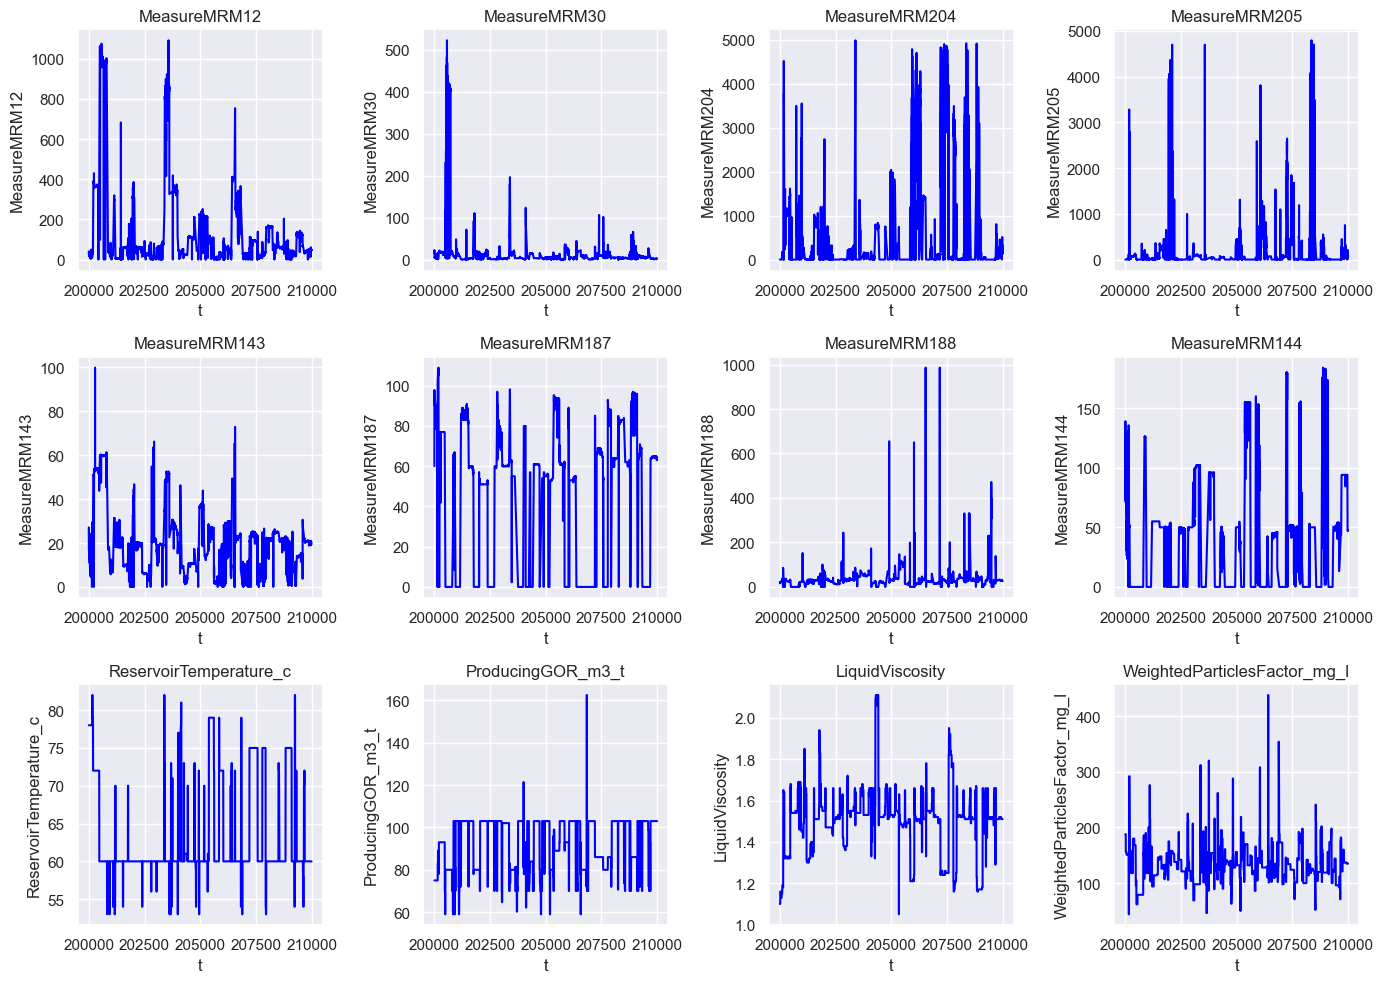

In [23]:
many_plot(series[200000:210000])

In [25]:
series=series.interpolate(method='pad')

In [26]:
series.columns

Index(['MeasureMRM12', 'MeasureMRM30', 'MeasureMRM204', 'MeasureMRM205',
       'MeasureMRM143', 'MeasureMRM187', 'MeasureMRM188', 'MeasureMRM144',
       'ReservoirTemperature_c', 'ProducingGOR_m3_t', 'LiquidViscosity',
       'WeightedParticlesFactor_mg_l'],
      dtype='object')

In [27]:
import scipy.stats as stats

In [28]:
z_scores=stats.zscore(series)
lower_threshold = -3.5
upper_threshold = 3.5
z_scores

,MeasureMRM12,MeasureMRM30,MeasureMRM204,MeasureMRM205,MeasureMRM143,MeasureMRM187,MeasureMRM188,MeasureMRM144,ReservoirTemperature_c,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.498301,-1.643393,0.469420,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.498301,-1.643393,0.469420,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.498301,-1.643393,0.469420,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.498301,-1.643393,0.469420,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.498301,-1.643393,0.469420,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
649363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.398983,-1.503614,0.501867,NaN
649364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.398983,-1.503614,0.501867,NaN
649365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.398983,-1.503614,0.501867,NaN
649366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.398983,-1.503614,0.501867,NaN


In [31]:
series=series.interpolate(method='pad')

In [32]:
series['MeasureMRM144']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
649363    0.0
649364    0.0
649365    0.0
649366    0.0
649367    0.0
Name: MeasureMRM144, Length: 649368, dtype: float64

In [33]:
series.head()

,MeasureMRM12,MeasureMRM30,MeasureMRM204,MeasureMRM205,MeasureMRM143,MeasureMRM187,MeasureMRM188,MeasureMRM144,ReservoirTemperature_c,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,1.64,NaN


In [34]:
missing_values_count = series.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
MeasureMRM12: 14
MeasureMRM30: 14
MeasureMRM204: 14
MeasureMRM205: 14
MeasureMRM143: 14
MeasureMRM187: 14
MeasureMRM188: 14
MeasureMRM144: 14
ReservoirTemperature_c: 0
ProducingGOR_m3_t: 0
LiquidViscosity: 0
WeightedParticlesFactor_mg_l: 14


In [35]:
series.shape

(649368, 12)

In [32]:
# series=series.drop(['cf_sf','cf_mp', 'cf_kf'], axis=1)

In [36]:
len(series)

649368

In [37]:
series = series.fillna(series.median())
series.head()

,MeasureMRM12,MeasureMRM30,MeasureMRM204,MeasureMRM205,MeasureMRM143,MeasureMRM187,MeasureMRM188,MeasureMRM144,ReservoirTemperature_c,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l
0,55.0,5.83,5.0,2.1,17.0,55.5,25.7,0.0,60.0,70.0,1.64,132.0
1,55.0,5.83,5.0,2.1,17.0,55.5,25.7,0.0,60.0,70.0,1.64,132.0
2,55.0,5.83,5.0,2.1,17.0,55.5,25.7,0.0,60.0,70.0,1.64,132.0
3,55.0,5.83,5.0,2.1,17.0,55.5,25.7,0.0,60.0,70.0,1.64,132.0
4,55.0,5.83,5.0,2.1,17.0,55.5,25.7,0.0,60.0,70.0,1.64,132.0


In [38]:
missing_values_count = series.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
MeasureMRM12: 0
MeasureMRM30: 0
MeasureMRM204: 0
MeasureMRM205: 0
MeasureMRM143: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM144: 0
ReservoirTemperature_c: 0
ProducingGOR_m3_t: 0
LiquidViscosity: 0
WeightedParticlesFactor_mg_l: 0


In [39]:
full = pd.concat([pd.Series(data['daysToFailure']), series], axis=1)
dataframe_anomaly = full[(full['daysToFailure'] <= 15)]
default_data=full[(full['daysToFailure'] > 15)]
dataframe_anomaly.shape, default_data.shape

((48667, 13), (600701, 13))

In [40]:
missing_values_count = default_data.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
daysToFailure: 0
MeasureMRM12: 0
MeasureMRM30: 0
MeasureMRM204: 0
MeasureMRM205: 0
MeasureMRM143: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM144: 0
ReservoirTemperature_c: 0
ProducingGOR_m3_t: 0
LiquidViscosity: 0
WeightedParticlesFactor_mg_l: 0


In [41]:
default_data=default_data.drop(['daysToFailure'], axis=1)
dataframe_anomaly=dataframe_anomaly.drop(['daysToFailure'], axis=1)
default_data.to_csv('normal dataset (no normalize).csv', index=False)
dataframe_anomaly.to_csv('anomaly dataset (no normalize).csv', index=False)

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Создаем экземпляр MinMaxScaler
scaler = MinMaxScaler()

# Извлекаем названия колонок
columns = series.columns

# Нормализуем данные в датафрейме X
series_normalized = pd.DataFrame(scaler.fit_transform(series), columns=columns)

In [50]:
# data['daysToFailure','Failure'].reset_index(drop=True, inplace=True)  # Сбросить индексы датафрейма ttf
# series_normalized.reset_index(drop=True, inplace=True)  # Сбросить индексы датафрейма series_normalized

# clean_data = pd.concat([data['daysToFailure','Failure'], series_normalized], sort=False, axis=1, join='outer')

In [51]:
# # Создаем экземпляр MinMaxScaler
# scaler = MinMaxScaler()

# # Извлекаем названия колонок
# columns = anomalies.columns

# # Нормализуем данные в датафрейме X
# anomalies_normalized = pd.DataFrame(scaler.fit_transform(anomalies), columns=columns)

# anomal['daysToFailure'].reset_index(drop=True, inplace=True)  # Сбросить индексы датафрейма ttf
# anomalies_normalized.reset_index(drop=True, inplace=True)  # Сбросить индексы датафрейма series_normalized

# anomalies = pd.concat([anomal['daysToFailure'], anomalies_normalized], sort=False, axis=1, join='outer')

In [52]:
series_normalized.describe()

,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
count,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000
mean,0.244705,0.063150,0.025027,0.794794,0.435325,0.245852,0.217351,0.265066,0.133167,0.178662,0.264198,0.388723
std,0.280440,0.146587,0.080615,0.186726,0.193786,0.115868,0.224560,0.163539,0.176858,0.145690,0.184697,0.286944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.772727,0.262500,0.182927,0.000000,0.191294,0.029233,0.069795,0.153129,0.257759
50%,0.000000,0.000633,0.000142,0.772727,0.475000,0.225610,0.308383,0.274914,0.060901,0.138270,0.229028,0.269332
75%,0.461538,0.049786,0.012603,0.909091,0.550000,0.286585,0.407186,0.339061,0.169306,0.254839,0.308921,0.675434
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
series_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24489 entries, 0 to 24488
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ReservoirTemperature_c        24489 non-null  float64
 1   MeasureMRM204                 24489 non-null  float64
 2   MeasureMRM205                 24489 non-null  float64
 3   ProducingGOR_m3_t             24489 non-null  float64
 4   LiquidViscosity               24489 non-null  float64
 5   WeightedParticlesFactor_mg_l  24489 non-null  float64
 6   MeasureMRM187                 24489 non-null  float64
 7   MeasureMRM188                 24489 non-null  float64
 8   MeasureMRM12                  24489 non-null  float64
 9   MeasureMRM30                  24489 non-null  float64
 10  MeasureMRM143                 24489 non-null  float64
 11  MeasureMRM144                 24489 non-null  float64
dtypes: float64(12)
memory usage: 2.2 MB


In [54]:
data.shape

(24489, 14)

In [55]:
y=data['Failure']
X=series_normalized

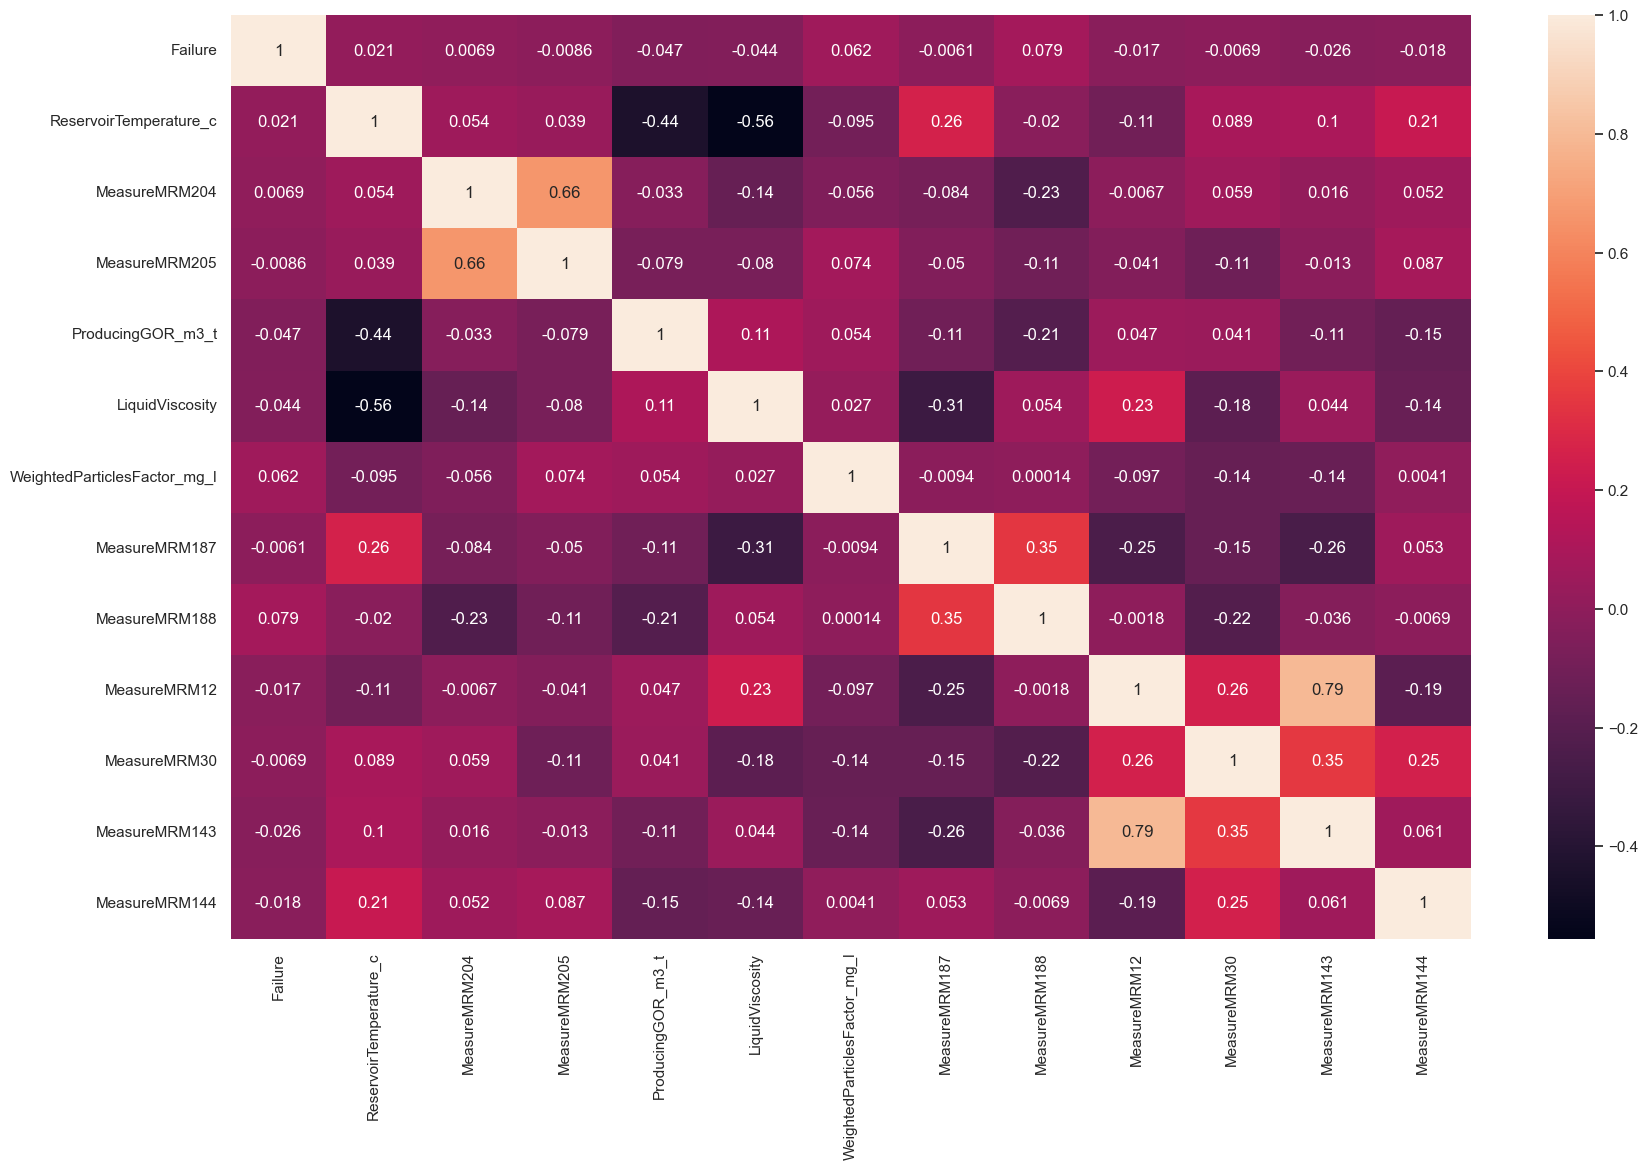

In [56]:
# Создаем DataFrame, объединяя целевую переменную y и признаки X
df = pd.concat([data['Failure'], series_normalized], axis=1)

# Вычисляем матрицу корреляции
corr = df.corr()

# Визуализируем матрицу корреляции с помощью seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True)
plt.show()

In [57]:
target_corr = corr['Failure'].sort_values(ascending=False)

if (target_corr > 0.01).all():
    print(target_corr)
else: 
    target_corr = target_corr[target_corr > 0.01]
    print(target_corr.keys())

Index(['Failure', 'MeasureMRM188', 'WeightedParticlesFactor_mg_l',
       'ReservoirTemperature_c'],
      dtype='object')


In [58]:
from sklearn.metrics import mutual_info_score

mi_scores = []
for column in X.columns:
    mi_score = mutual_info_score(X[column], y)
    mi_scores.append((column, mi_score))

mi_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in mi_scores:
    print("Оценка взаимной информации для {} - {}".format(feature, score))

Оценка взаимной информации для MeasureMRM30 - 0.09317797677491317
Оценка взаимной информации для MeasureMRM204 - 0.09206184826304854
Оценка взаимной информации для MeasureMRM205 - 0.058460282499232616
Оценка взаимной информации для WeightedParticlesFactor_mg_l - 0.04548969816103958
Оценка взаимной информации для MeasureMRM188 - 0.042075736038095765
Оценка взаимной информации для MeasureMRM143 - 0.040858441511156224
Оценка взаимной информации для MeasureMRM144 - 0.03923876890715932
Оценка взаимной информации для MeasureMRM12 - 0.030064410921968
Оценка взаимной информации для MeasureMRM187 - 0.02968218835280773
Оценка взаимной информации для LiquidViscosity - 0.022388479914370915
Оценка взаимной информации для ProducingGOR_m3_t - 0.007380959955215159
Оценка взаимной информации для ReservoirTemperature_c - 0.007161898703840909


d:\anaconda\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
d:\anaconda\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
d:\anaconda\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
d:\anaconda\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
d:\anaconda\Lib\site-packages\sklearn\metrics\cluster\_supervise

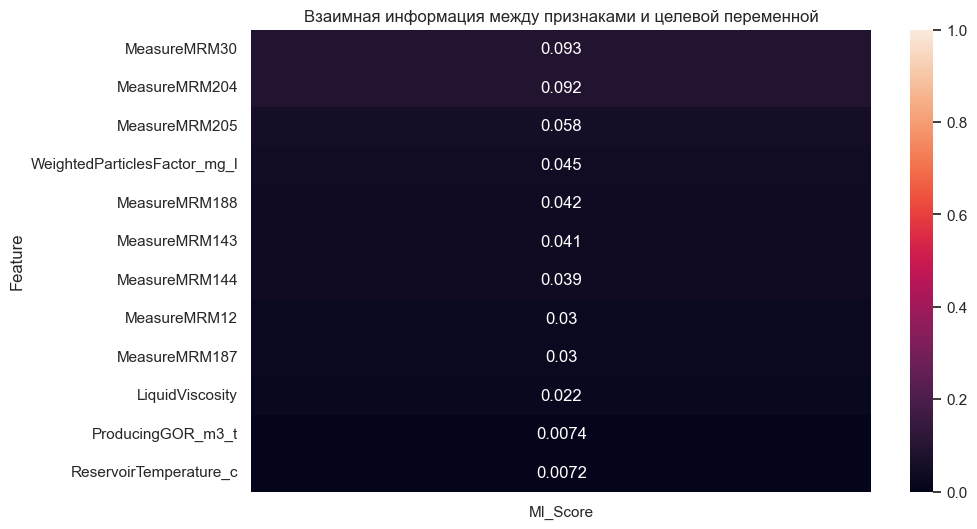

In [59]:
# Создаем DataFrame из оценок взаимной информации
mi_df = pd.DataFrame(mi_scores, columns=['Feature', 'MI_Score'])
mi_df = mi_df.set_index('Feature')

# Визуализируем оценки взаимной информации с помощью тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(mi_df, annot=True, vmin=0, vmax=1)
plt.title('Взаимная информация между признаками и целевой переменной')
plt.show()

In [60]:
mi_df

,MI_Score
Feature,
MeasureMRM30,0.093178
MeasureMRM204,0.092062
MeasureMRM205,0.058460
WeightedParticlesFactor_mg_l,0.045490
MeasureMRM188,0.042076
MeasureMRM143,0.040858
MeasureMRM144,0.039239
MeasureMRM12,0.030064
MeasureMRM187,0.029682


In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
f_statistic, p_values = f_classif(X, y)
selector = SelectKBest(f_classif, k=4)
X_f = selector.fit_transform(X,y)
mask = selector.get_support(indices=True)
best_features = [X.columns[i] for i in mask]
print(best_features)

['ProducingGOR_m3_t', 'LiquidViscosity', 'WeightedParticlesFactor_mg_l', 'MeasureMRM188']


In [62]:
dataframe = pd.concat([data['daysToFailure'], series_normalized], axis=1)
anomaly5 = dataframe[dataframe['daysToFailure'] <= 5].copy()
anomaly5.to_csv('anomaly5.csv', index=False)
anomaly10=dataframe[dataframe['daysToFailure'] <= 10].copy()
anomaly10.to_csv('anomaly10.csv', index=False)
anomaly10=dataframe[dataframe['daysToFailure'] <= 3].copy()
anomaly10.to_csv('anomaly3.csv', index=False)
anomaly10=dataframe[dataframe['daysToFailure'] <= 1].copy()
anomaly10.to_csv('anomaly1.csv', index=False)

In [63]:
# dataframe = pd.concat([pd.Series(data['daysToFailure']), series_normalized], axis=1)
# dataframe = dataframe[(dataframe['daysToFailure'] > 15) & (dataframe['daysToFailure'] <= 345)]
# # Разделим датафрейм на равные отрезки по 5 дней значения daysToFailure
# bins = list(range(0, 350, 5))
# labels = [f"{i}-{i+4}" for i in range(0, 345, 5)]
# dataframe['daysToFailure_binned'] = pd.cut(dataframe['daysToFailure'], bins=bins, labels=labels, include_lowest=True)

In [64]:
# dataframe.shape

In [65]:
anomaly_df = pd.concat([pd.Series(data['daysToFailure']), series_normalized], axis=1)
dataframe_anomaly = anomaly_df[(anomaly_df['daysToFailure'] <= 15)]

In [66]:
dataframe.head()

,daysToFailure,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
0,338,1.0,0.0,0.0,0.772727,0.425,0.329268,0.526946,0.292096,0.166870,0.300880,0.185087,0.269332
1,337,1.0,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.286369,0.165652,0.298240,0.185087,0.269332
2,336,1.0,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.166870,0.301906,0.185087,0.269332
3,335,1.0,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.166870,0.301173,0.185087,0.269332
4,334,1.0,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.165652,0.300000,0.185087,0.269332


In [67]:
dataframe_anomaly.head()

,daysToFailure,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
323,15,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.147381,0.177273,0.194407,0.269332
324,14,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.146163,0.176686,0.194407,0.269332
325,13,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.144945,0.174780,0.194407,0.269332
326,12,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.138855,0.166569,0.194407,0.269332
327,11,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.130329,0.157185,0.194407,0.269332


In [68]:
dataframe.describe()

,daysToFailure,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
count,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000,24489.000000
mean,227.346441,0.244705,0.063150,0.025027,0.794794,0.435325,0.245852,0.217351,0.265066,0.133167,0.178662,0.264198,0.388723
std,186.728589,0.280440,0.146587,0.080615,0.186726,0.193786,0.115868,0.224560,0.163539,0.176858,0.145690,0.184697,0.286944
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,0.000000,0.000000,0.000000,0.772727,0.262500,0.182927,0.000000,0.191294,0.029233,0.069795,0.153129,0.257759
50%,185.000000,0.000000,0.000633,0.000142,0.772727,0.475000,0.225610,0.308383,0.274914,0.060901,0.138270,0.229028,0.269332
75%,331.000000,0.461538,0.049786,0.012603,0.909091,0.550000,0.286585,0.407186,0.339061,0.169306,0.254839,0.308921,0.675434
max,970.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
dataframe_anomaly=dataframe_anomaly.drop(['daysToFailure'], axis=1)
dataframe=dataframe.drop(['daysToFailure'], axis=1)

In [70]:
dataframe_anomaly.shape, dataframe.shape

((1519, 12), (24489, 12))

In [71]:
dataframe.to_csv('df_seq=5.csv', index=False)
dataframe_anomaly.to_csv('df_anomaly_seq=5.csv', index=False)

In [72]:
anomaly5.shape

(537, 13)

In [73]:
anomaly10.shape

(108, 13)

In [74]:
anomalies = df[df['Failure'] == 1].copy()
clean_data = df[df['Failure'] == 0].copy()

In [75]:
clean_data.shape

(22970, 13)

In [76]:
anomalies.shape

(1519, 13)

In [77]:
clean_data.columns

Index(['Failure', 'ReservoirTemperature_c', 'MeasureMRM204', 'MeasureMRM205',
       'ProducingGOR_m3_t', 'LiquidViscosity', 'WeightedParticlesFactor_mg_l',
       'MeasureMRM187', 'MeasureMRM188', 'MeasureMRM12', 'MeasureMRM30',
       'MeasureMRM143', 'MeasureMRM144'],
      dtype='object')

In [78]:
anomalies.columns

Index(['Failure', 'ReservoirTemperature_c', 'MeasureMRM204', 'MeasureMRM205',
       'ProducingGOR_m3_t', 'LiquidViscosity', 'WeightedParticlesFactor_mg_l',
       'MeasureMRM187', 'MeasureMRM188', 'MeasureMRM12', 'MeasureMRM30',
       'MeasureMRM143', 'MeasureMRM144'],
      dtype='object')

In [79]:
# anomalies=anomalies.interpolate(method='pad')
# anomalies = anomalies.fillna(anomalies.median())

In [80]:
missing_values_count = clean_data.isna().sum()

print("Количество пропусков в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропусков в каждой колонке:
Failure: 0
ReservoirTemperature_c: 0
MeasureMRM204: 0
MeasureMRM205: 0
ProducingGOR_m3_t: 0
LiquidViscosity: 0
WeightedParticlesFactor_mg_l: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM12: 0
MeasureMRM30: 0
MeasureMRM143: 0
MeasureMRM144: 0


In [81]:
missing_values_count = anomalies.isna().sum()

print("Количество пропусков в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропусков в каждой колонке:
Failure: 0
ReservoirTemperature_c: 0
MeasureMRM204: 0
MeasureMRM205: 0
ProducingGOR_m3_t: 0
LiquidViscosity: 0
WeightedParticlesFactor_mg_l: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM12: 0
MeasureMRM30: 0
MeasureMRM143: 0
MeasureMRM144: 0


In [82]:
anomalies.head()

,Failure,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
323,1,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.147381,0.177273,0.194407,0.269332
324,1,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.146163,0.176686,0.194407,0.269332
325,1,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.144945,0.174780,0.194407,0.269332
326,1,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.138855,0.166569,0.194407,0.269332
327,1,1.0,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.130329,0.157185,0.194407,0.269332


In [83]:
clean_data.head()

,Failure,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
0,0,1.0,0.0,0.0,0.772727,0.425,0.329268,0.526946,0.292096,0.166870,0.300880,0.185087,0.269332
1,0,1.0,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.286369,0.165652,0.298240,0.185087,0.269332
2,0,1.0,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.166870,0.301906,0.185087,0.269332
3,0,1.0,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.166870,0.301173,0.185087,0.269332
4,0,1.0,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.165652,0.300000,0.185087,0.269332


In [42]:
combined_df = pd.concat([anomalies, clean_data], ignore_index=True).drop(['Failure'], axis=1)
combined_df.head()

NameError: name 'anomalies' is not defined

In [85]:
combined_df.shape

(24489, 12)

In [86]:
combined_df.to_csv('combo.csv', index=False)

In [87]:
anomalies=anomalies.drop(['Failure'],axis=1)

In [88]:
clean_data=clean_data.drop(['Failure'],axis=1)

In [89]:
anomalies.to_csv('anomalies.csv', index=False)

clean_data.to_csv('clean_data.csv', index=False)

In [90]:
clean_data

,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
0,1.000000,0.0,0.0,0.772727,0.425,0.329268,0.526946,0.292096,0.166870,0.300880,0.185087,0.269332
1,1.000000,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.286369,0.165652,0.298240,0.185087,0.269332
2,1.000000,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.166870,0.301906,0.185087,0.269332
3,1.000000,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.166870,0.301173,0.185087,0.269332
4,1.000000,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.165652,0.300000,0.185087,0.269332
...,...,...,...,...,...,...,...,...,...,...,...,...
24469,0.461538,0.0,0.0,0.772727,0.150,0.073171,0.000000,0.000000,0.032887,0.381378,0.185087,0.513940
24470,0.461538,0.0,0.0,0.772727,0.150,0.073171,0.000000,0.000000,0.034105,0.390909,0.169108,0.466597
24471,0.461538,0.0,0.0,0.772727,0.150,0.073171,0.000000,0.000000,0.034105,0.396188,0.175766,0.486586
24472,0.461538,0.0,0.0,0.772727,0.150,0.073171,0.000000,0.000000,0.032887,0.382698,0.165113,0.456076


In [91]:
combined_df.shape

(24489, 12)

In [92]:

clean_data.shape

(22970, 12)

In [93]:
anomalies.shape

(1519, 12)

In [94]:
combined_df.columns

Index(['ReservoirTemperature_c', 'MeasureMRM204', 'MeasureMRM205',
       'ProducingGOR_m3_t', 'LiquidViscosity', 'WeightedParticlesFactor_mg_l',
       'MeasureMRM187', 'MeasureMRM188', 'MeasureMRM12', 'MeasureMRM30',
       'MeasureMRM143', 'MeasureMRM144'],
      dtype='object')

In [95]:
# sns.set(style='dark')
# fig, ax = plt.subplots(figsize=(14, 6), dpi=80)

# for col in clean_data.columns:
#     ax.plot(clean_data[col], label=col, linewidth=2)

# for col in anomalies.columns:
#     ax.plot(anomalies[col], label=col, linewidth=2)

# # ax.legend(loc='lower left')
# ax.set_title('temetry', fontsize=16)
# plt.show()

In [96]:
clean_data.columns

Index(['ReservoirTemperature_c', 'MeasureMRM204', 'MeasureMRM205',
       'ProducingGOR_m3_t', 'LiquidViscosity', 'WeightedParticlesFactor_mg_l',
       'MeasureMRM187', 'MeasureMRM188', 'MeasureMRM12', 'MeasureMRM30',
       'MeasureMRM143', 'MeasureMRM144'],
      dtype='object')

In [97]:
columns=combined_df.columns

In [98]:
columns

Index(['ReservoirTemperature_c', 'MeasureMRM204', 'MeasureMRM205',
       'ProducingGOR_m3_t', 'LiquidViscosity', 'WeightedParticlesFactor_mg_l',
       'MeasureMRM187', 'MeasureMRM188', 'MeasureMRM12', 'MeasureMRM30',
       'MeasureMRM143', 'MeasureMRM144'],
      dtype='object')

In [99]:
threshold=1519

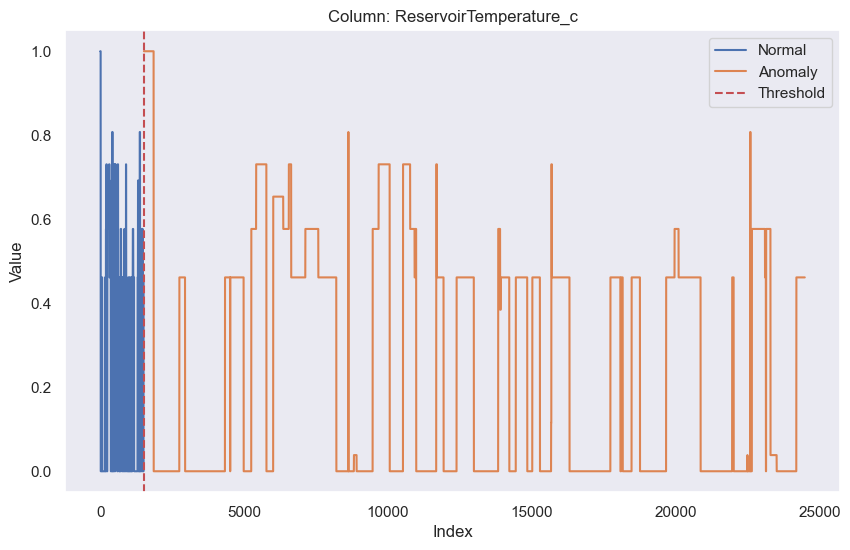

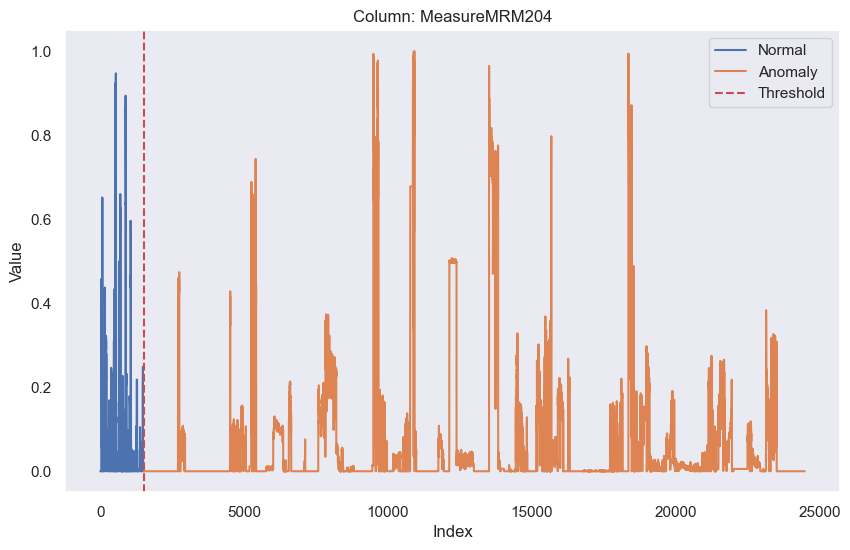

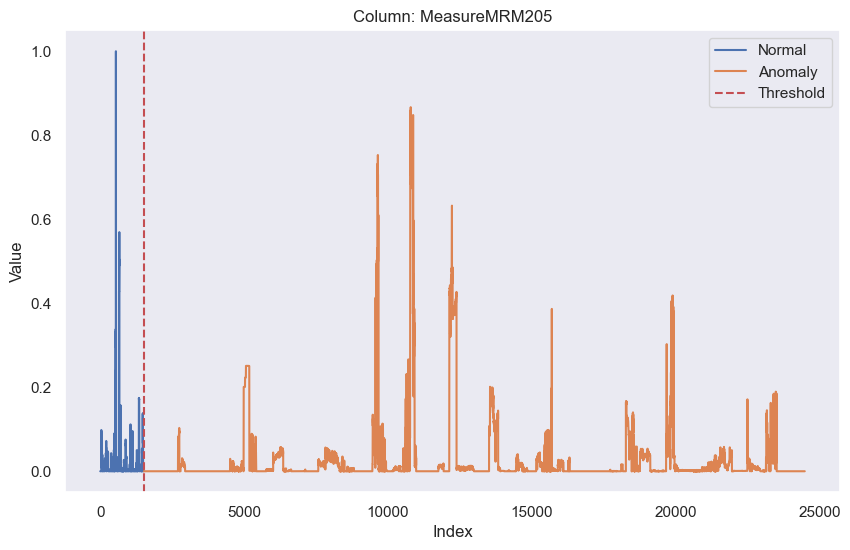

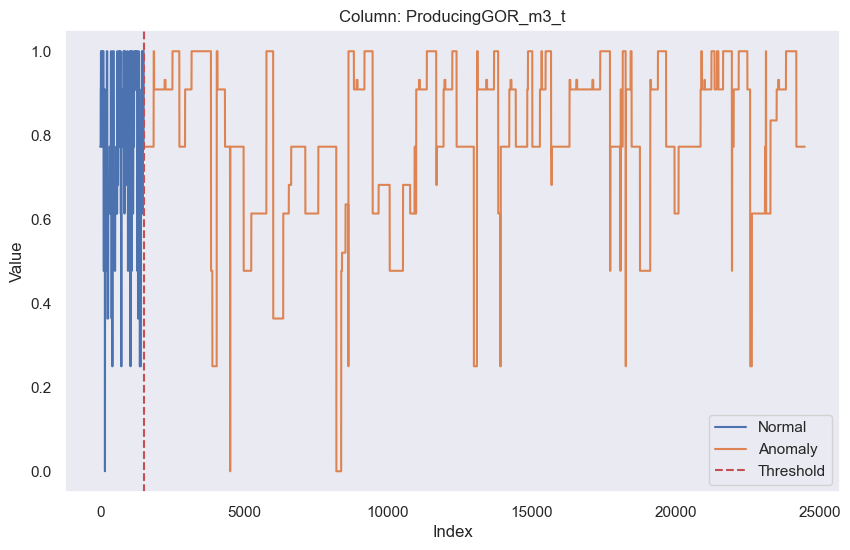

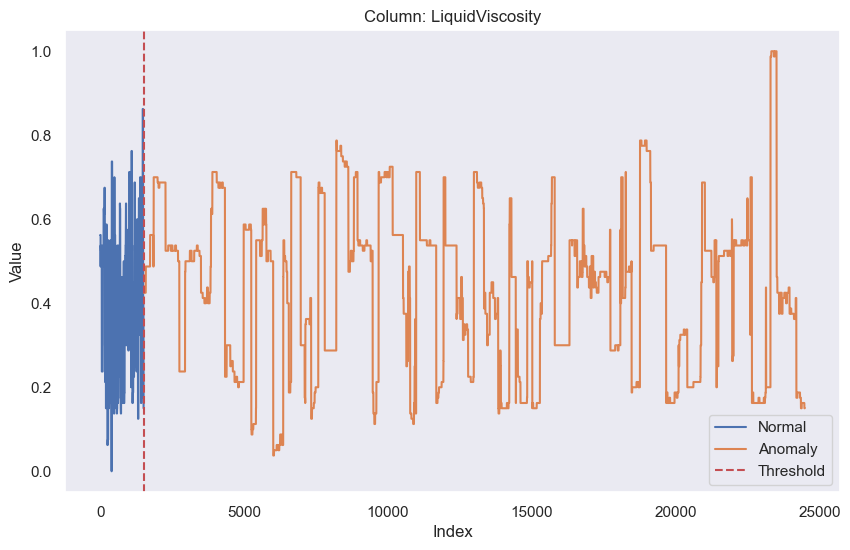

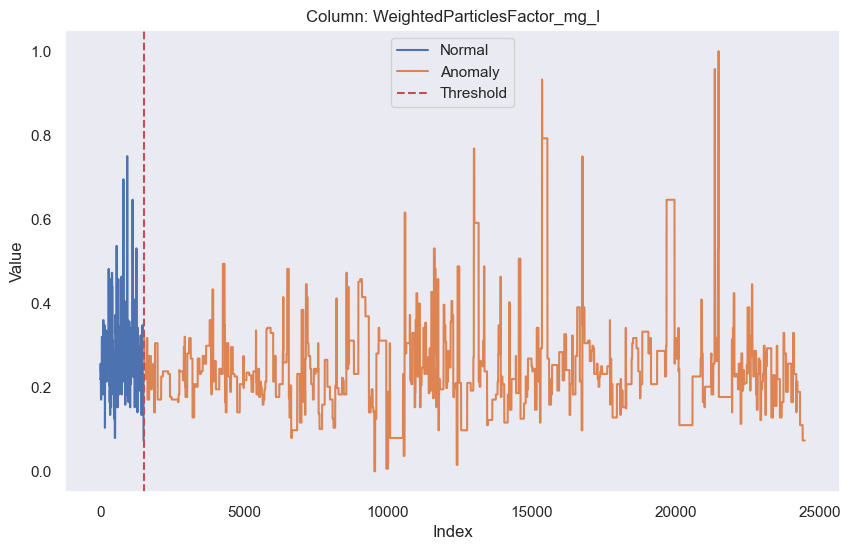

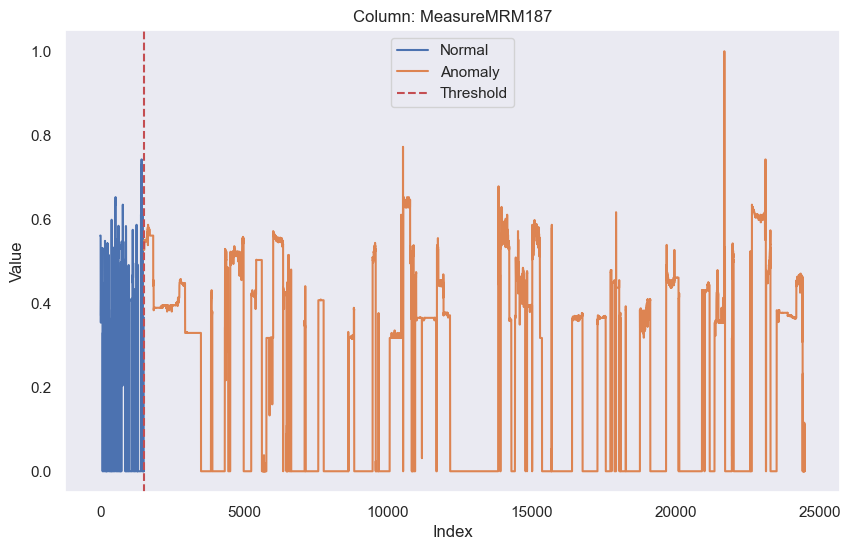

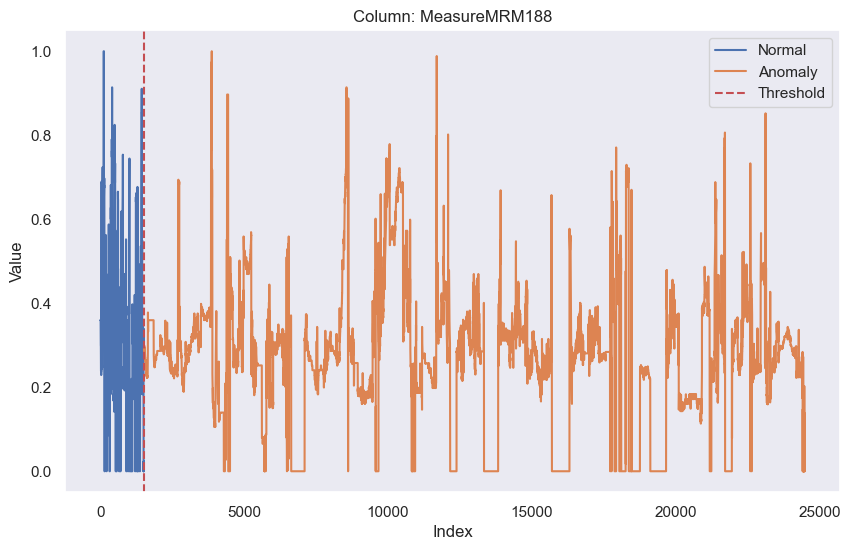

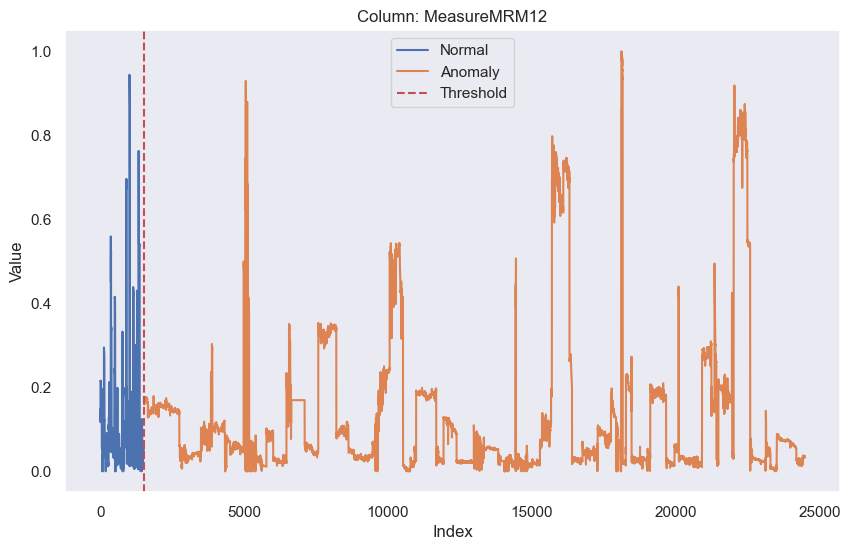

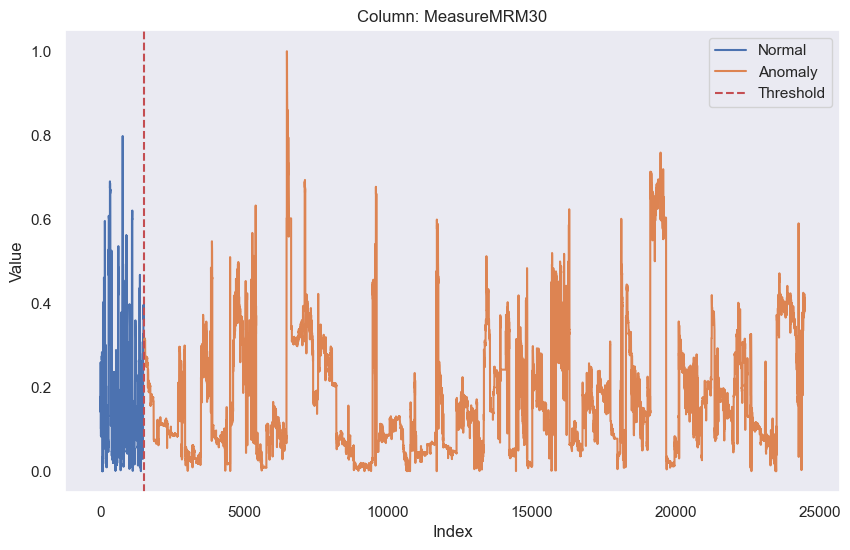

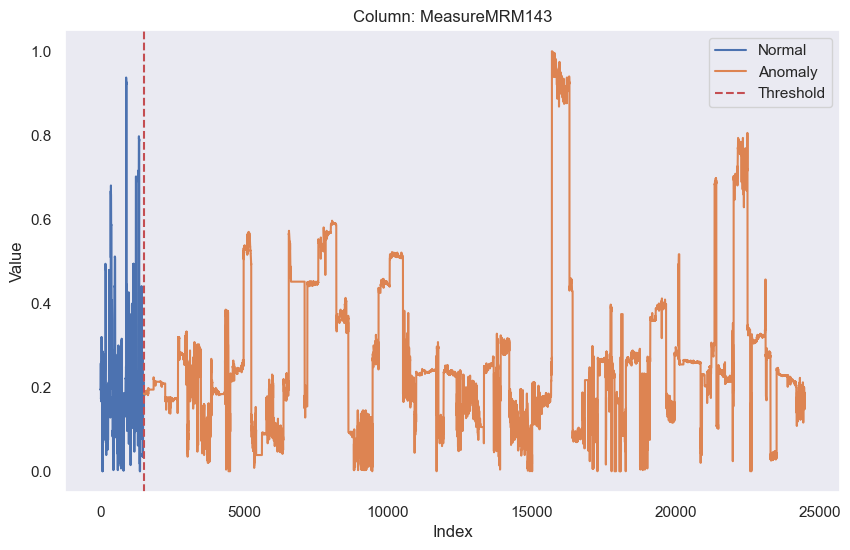

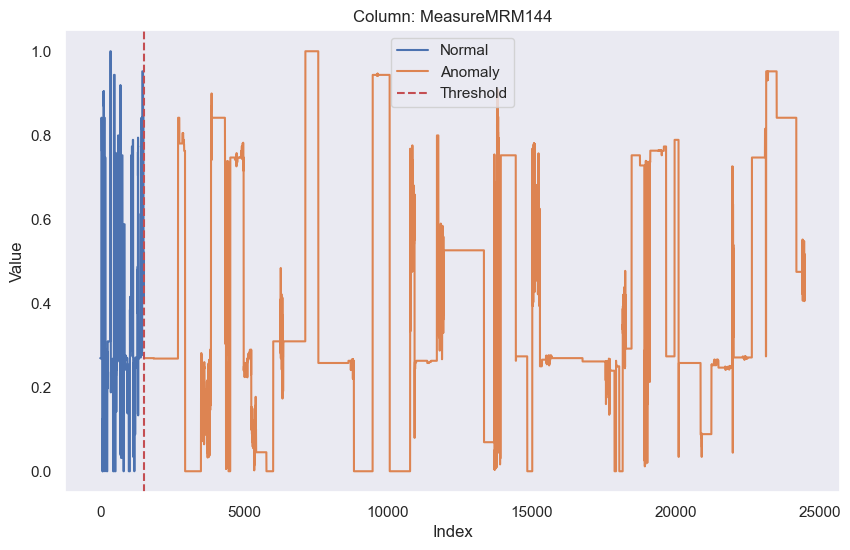

In [100]:
sns.set(style='dark')
folder_path = 'features'  # Путь к папке features

# Создаем папку features, если она не существует
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for col in columns:
    plt.figure(figsize=(10, 6))
    normal_data = combined_df.loc[combined_df.index < threshold, col]
    anomaly_data = combined_df.loc[combined_df.index >= threshold, col]
    
    plt.plot(normal_data, label='Normal')
    plt.plot(anomaly_data, label='Anomaly')
    
    plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
    plt.title(f'Column: {col}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    
    # Сохраняем график в файл
    file_path = os.path.join(folder_path, f'{col}.png')
    plt.savefig(file_path, bbox_inches='tight')
    # plt.close()
    plt.show()

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(anomalies)

PCA(n_components=2)

In [102]:
anomalies_pca = pca.transform(anomalies)

In [103]:
anomalies

,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
323,1.000000,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.147381,0.177273,0.194407,0.269332
324,1.000000,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.146163,0.176686,0.194407,0.269332
325,1.000000,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.144945,0.174780,0.194407,0.269332
326,1.000000,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.138855,0.166569,0.194407,0.269332
327,1.000000,0.0,0.0,0.772727,0.5625,0.219512,0.561078,0.359679,0.130329,0.157185,0.194407,0.269332
...,...,...,...,...,...,...,...,...,...,...,...,...
24484,0.461538,0.0,0.0,0.772727,0.1500,0.073171,0.000000,0.000000,0.031669,0.364370,0.177097,0.492898
24485,0.461538,0.0,0.0,0.772727,0.1500,0.073171,0.000000,0.000000,0.031669,0.364370,0.189081,0.520779
24486,0.461538,0.0,0.0,0.772727,0.1500,0.073171,0.000000,0.000000,0.034105,0.391056,0.175766,0.490268
24487,0.461538,0.0,0.0,0.772727,0.1500,0.073171,0.000000,0.000000,0.034105,0.396334,0.173103,0.488690


In [104]:
pca = PCA(n_components=2)
pca.fit(clean_data)
clean_data_pca=pca.transform(clean_data)

In [105]:
clean_data

,ReservoirTemperature_c,MeasureMRM204,MeasureMRM205,ProducingGOR_m3_t,LiquidViscosity,WeightedParticlesFactor_mg_l,MeasureMRM187,MeasureMRM188,MeasureMRM12,MeasureMRM30,MeasureMRM143,MeasureMRM144
0,1.000000,0.0,0.0,0.772727,0.425,0.329268,0.526946,0.292096,0.166870,0.300880,0.185087,0.269332
1,1.000000,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.286369,0.165652,0.298240,0.185087,0.269332
2,1.000000,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.166870,0.301906,0.185087,0.269332
3,1.000000,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.166870,0.301173,0.185087,0.269332
4,1.000000,0.0,0.0,0.772727,0.425,0.256098,0.526946,0.284078,0.165652,0.300000,0.185087,0.269332
...,...,...,...,...,...,...,...,...,...,...,...,...
24469,0.461538,0.0,0.0,0.772727,0.150,0.073171,0.000000,0.000000,0.032887,0.381378,0.185087,0.513940
24470,0.461538,0.0,0.0,0.772727,0.150,0.073171,0.000000,0.000000,0.034105,0.390909,0.169108,0.466597
24471,0.461538,0.0,0.0,0.772727,0.150,0.073171,0.000000,0.000000,0.034105,0.396188,0.175766,0.486586
24472,0.461538,0.0,0.0,0.772727,0.150,0.073171,0.000000,0.000000,0.032887,0.382698,0.165113,0.456076


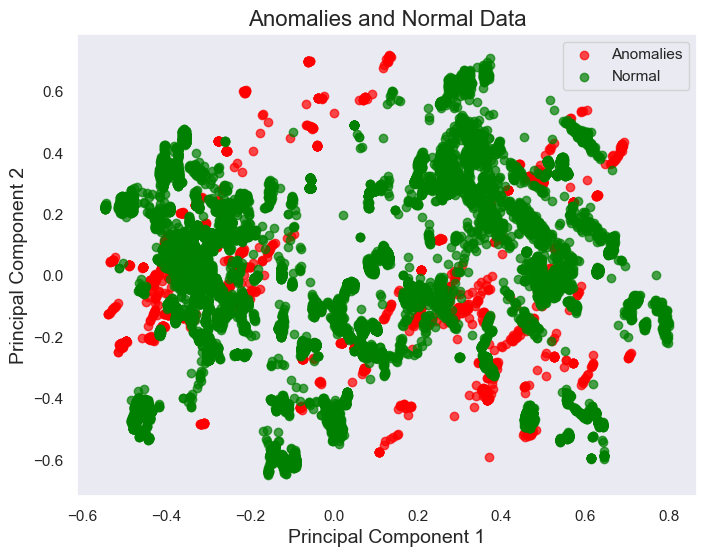

In [106]:
# Установка стиля Seaborn v0.8
sns.set(style='dark')

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(8, 6))

# Построение точек аномальных данных
ax.scatter(anomalies_pca[:, 0], anomalies_pca[:, 1], color='red', label='Anomalies', alpha=0.7)

# Построение точек чистых данных
ax.scatter(clean_data_pca[:, 0], clean_data_pca[:, 1], color='green', label='Normal', alpha=0.7)

# Добавление легенды
ax.legend()

# Установка заголовка и меток осей
ax.set_title('Anomalies and Normal Data', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
plt.savefig('anomalies_and_clean_data.png', dpi=300, bbox_inches='tight')
# Отображение графика
plt.show()

In [107]:
pca = PCA(n_components=2)
pca.fit(combined_df)
combined_df_pca=pca.transform(combined_df)

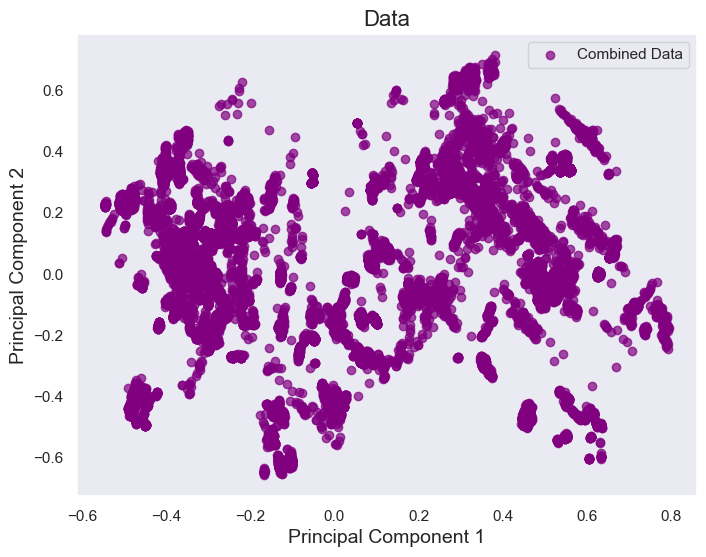

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля Seaborn v0.8
sns.set(style='dark')

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(8, 6))

# Построение точек для combined_df
ax.scatter(combined_df_pca[:, 0], combined_df_pca[:, 1], color='purple', label='Combined Data', alpha=0.7)

# Добавление легенды
ax.legend()

# Установка заголовка и меток осей
ax.set_title('Data', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
plt.savefig('full_data.png', dpi=300, bbox_inches='tight')
# Отображение графика
plt.show()